<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO3/Proyecto3_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p>

<h1><b>Proyecto 3: Filtros</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

##<b>Contexto del problema</b>

<h4>Las enfermedades cardiovasculares son una de las principales causas de muerte global, con 17,9 millones de muertes en 2019 según la OMS. Su riesgo se incrementa por factores como el tabaquismo, hipertensión, sedentarismo, obesidad, entre otras condiciones.</h4>

<h4>La tecnología, incluyendo sensores en dispositivos de Electrocardiografía (ECG), puede mejorar tratamientos y seguimientos. La medición de parámetros como frecuencia cardíaca y presión arterial es esencial, aunque su variabilidad requiere datos de grandes muestras para construir modelos diagnósticos precisos. El avance respecto a bioseñales implica organizar la cantidad de datos necesaria sobre diversas enfermedades cardiovasculares, mediante un procesado y etiquetado adecuados, con el fin de construir modelos para diagnóstico o predicción. El enfoque de grandes volúmenes de datos permite validar el procesamiento y análisis en diferentes poblaciones y tecnologías, aumentando la pertinencia de las tecnologías desarrolladas.</h4>

<h4>El ECG, que registra la actividad eléctrica del corazón, es fundamental en la detección de problemas cardiovasculares. Se utiliza un sistema de 12 derivaciones, combinando electrodos en extremidades y tórax para obtener una visión integral de la función cardíaca, con amplitudes de señal de 10 µV a 4 mV y frecuencias relevantes de 0,05 a 100 Hz <b>[1]</b>.</h4>

##<b>Origen de los datos</b>

<h4>La base de datos para el desarrollo del proyecto se basa en una investigación de ECG, establecida por la Universidad de Chapman y el Hospital del Pueblo de Shaoxing. La investigación tiene por objetivo estudiar las señales biomédicas cardiovasculares a través de extensas simulaciones por computadora. Aborda condiciones como la fibrilación auricular, que impactan significativamente en la salud pública y los costos médicos. La base de datos incluye 10,646 ECG de 12 derivaciones muestreados a 500 Hz, con 11 ritmos comunes y 67 condiciones <b>[2]</b>.</h4>

##<b>Entregable</b>

###<h4><b>1. </b>Del artículo <b>[3]</b>, consultar y explicar los dos métodos de reducción de ruido usados en el artículo: Robust LOESS y Non Local Means. Mostrar cómo se podrían implementar en Python.</h4>

<b>Robust LOESS (Locally Estimated Scatterplot Smoothing):</b> Es un método de reducción de ruido aplicable a señales no paramétricas, que funciona con el ajuste de una función de regresión para un conjunto de datos a partir de una ventana deslizante. La ventana toma diferentes valores locales y realiza un ajuste por mínimos cuadrados ponderados, de acuerdo a un parámetro de suavización $α$, que se puede establecer en el siguiente rango:

<h4>$(λ + 1)/n \lt α \lt 1$</h4>

<b>Donde</b>
> $λ$ es el grado del polinomio local<br>
$n$ es el número de datos de la señal

Valores más cercanos a la unidad, resultan en curvas más suaves, mientras que valores pequeños del parámetro pueden implicar un sobreajuste de la curva a los datos. Se recomienda definir $\alpha$ en un rango aproximado de 0,25 a 0,5 <b>[4]</b>.

Esta técnica es relativamente resistente a valores atípicos o ruido en los datos, teniendo en cuenta el tipo de regresión que se utilice, lo que depende de la tendencia de dispersión de los datos. Por lo general, se usa una regresión polinómica de grado 2 en adelante, o una regresión lineal si la distribución de puntos no tiene un patrón tan desordenado o si se desea obtener una función menos compleja que no se ajuste con gran precisión a todos los datos, necesariamente. El proceso para aplicar este método de suavizado se describe así:

><b>1. Selección de datos con ventanas locales:</b> se recorren los valores del vector de datos con una ventana, definida por el parámetro de suavizado ($α$), que abarca los puntos más cercanos a un valor central.<br>
<b>2. Ponderación de puntos:</b> se calculan pesos de los puntos de acuerdo a su distancia del valor central de la ventana local; mientras más cerca estén del centro, más peso se les asigna.<br>
<b>3. Función de regresión local:</b> luego de definir los pesos de cada punto dentro de la ventana, se construye una función de regresión polinómica (la regresión lineal cuenta como una polinómica de grado 1) con dichos pesos como coeficientes de los puntos vecinos. Los datos atípicos se caracterizan por presentar una mayor distancia del punto central en cierta ventana, por lo que se les asigna un peso menor y no tiene una influencia significativa en la estimación del modelo final.

A continuación, se presenta la implementación de este método en código. Se importa el módulo ```statsmodels.api```que tiene la función ```lowess``` para aplicar el suavizado de dispersión estimado localmente. Se deben definir parámetros como el porcentaje de datos a tomar en la ventana local (equiparable a definir $α$) y las iteraciones de estimación de cada ventana.

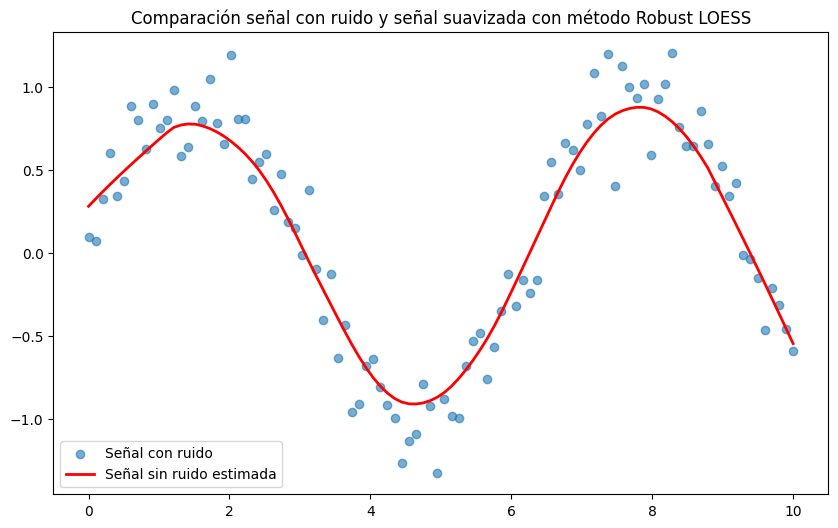

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

alpha = 0.25
iterations = 3
lowess = sm.nonparametric.lowess(y, x, frac=alpha, it=iterations)
y_smoothed = lowess[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Señal con ruido", alpha=0.6)
plt.plot(x, y_smoothed, label="Señal sin ruido estimada", color='red', linewidth=2)
plt.legend()
plt.title('Comparación señal con ruido y señal suavizada con método Robust LOESS')
plt.show()

<b>Non-Local Means (NLM):</b> Es un método para reducir ruido en imágenes, señales y demás tipos de conjuntos de datos. Consiste en la estimación de valores por comparación con puntos adyacentes o con puntos de características similares que no necesariamente son vecinos, pero se encuentran en una ventana local. La comparación de puntos se desarrolla mediante la medición de la distancia euclidiana cuadrada entre parches (que equivalen a ventanas locales que encierra solo una porción de los datos) centrados en diferentes puntos. A partir del cálculo de la distancia, se definen pesos para promediar los valores de la señal en diferentes proporciones de los puntos del parche <b>[5]</b>.

Para construir el algoritmo de NLM, se consideran las siguientes expresiones:

<h4>$\hat{u}_i(p) = \frac{1}{C(p)} \sum_{q \in B(p, r)} u_i(q)w(p, q), \quad
C(p) = \sum_{q \in B(p, r)} w(p, q) , \quad w(p, q) = e^{-\frac{\max(d^2 - 2\sigma^2, 0.0)}{h^2}}
$</h4>

<b>Donde</b>
> $\hat{u}_i(p)$ es un valor $i$ filtrado de la señal centrada en $p$<br>
$B(p,r)$ es un parche centrado en $p$ con tamaño $(2r+1) × (2r+1)$<br>
$w(p,q)$ es el peso de los valores de la señal (donde $d^2=d^2(B(p,f),B(q,f))$, $σ$ es la desviación estándar y $h$ es un parámetro de filtrado definido según $σ$)<br>
$u_i(q)$ es un valor original de la señal centrado en $q$

Aplicar este método a bioseñales, se puede mejorar su calidad al reducir el ruido debido a interferencia eléctrica o artefactos de movimiento sin afectar gravemente los componentes carácterísticos de la señal. Algunos pasos que comúnmente se aplican para este método son los siguientes:

><b>1. Definición de parche o ventana: </b> se define un área de puntos que abarca el parche o ventana donde se hace la comparación de similitud. Esta área debe ser amplia si se requiere establecer similitudes entre puntos no cercanos.<br>
<b>2. Ponderación de datos similares:</b> mediante el cálculo de la distancia euclídea se calculan las similitudes entre el punto central y los demás puntos, y a partir de la distancia se asignan pesos para cada punto comparado.<br>
<b>3. Suavizado:</b> se remplazan los valores que contiene ruido por nuevos valores estimados con la media ponderada de la ventana local o parche.

A continuación, se presenta la implementación de este método en código. Se deben definir parámetros como el tamaño del parche o ventana, el tamaño de ventana de búsqueda de parches cercanos o similares, y el parámetro de filtrado $h$ para la función de pesos $w(p,q)$.

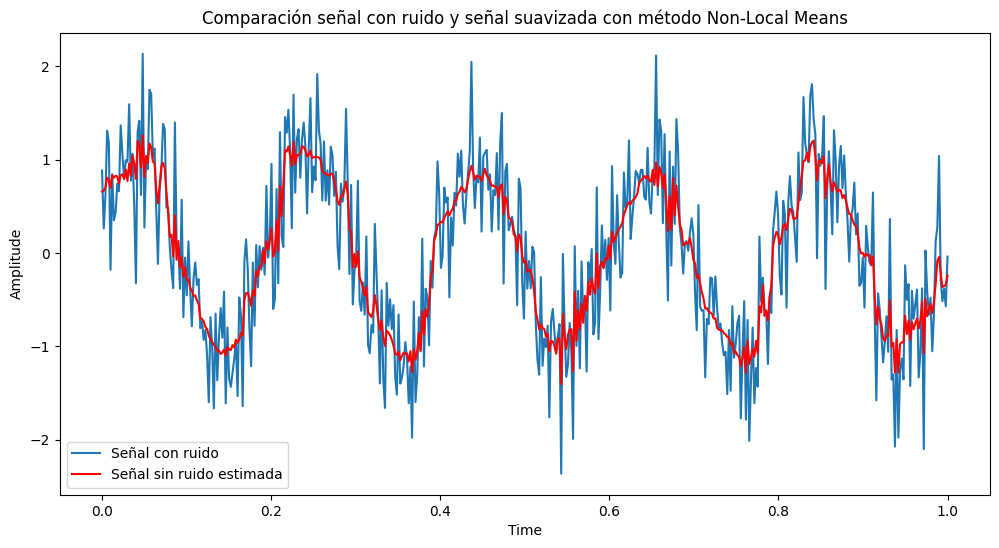

In [2]:
def non_local_means(signal, patch_size=5, search_window=20, h=1.0):
    n = len(signal)
    filtered_signal = np.zeros(n)
    normalization = np.zeros(n)

    half_patch = patch_size // 2
    half_window = search_window // 2

    padded_signal = np.pad(signal, (half_patch, half_patch), mode='symmetric')
    for i in range(n):
        patch_i = padded_signal[i:i + patch_size]
        weights_sum = 0
        weighted_value_sum = 0

        for j in range(max(i - half_window, 0), min(i + half_window + 1, n)):
            if j == i:
                continue

            patch_j = padded_signal[j:j + patch_size]
            d2 = np.sum((patch_i - patch_j) ** 2) / patch_size
            weight = np.exp(-max(d2 - 2 * h**2, 0) / h**2)
            weights_sum += weight
            weighted_value_sum += weight * signal[j]
        filtered_signal[i] = (weighted_value_sum + signal[i]) / (weights_sum + 1)
    return filtered_signal

np.random.seed(0)
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=t.shape)
denoised_signal = non_local_means(signal, patch_size=5, search_window=20, h=0.5)

plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Señal con ruido")
plt.plot(t, denoised_signal, label="Señal sin ruido estimada", color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Comparación señal con ruido y señal suavizada con método Non-Local Means')
plt.show()

###<h4><b>2. </b>De la base de datos extraer los registros que correspondan a bradicardia sinusal (<i>SB Sinus Bradycardia</i>) y fibrilación auricular (<i>AFIB Atrial Fibrillation</i>).</h4>



Para fines prácticos de este proyecto, se filtraron los datos de acuerdo a los valores de la columna <i>Rhythm</i> correspondientes a <i>SB</i> o <i>AFIBB</i>. Este proceso, junto con la eliminación de las columnas diferentes de la derivación II en los archivos .csv, se realizó a través del código en el siguiente <a href="https://colab.research.google.com/drive/1sMFf2cTo8-dqhe6M75dvQLkE-cEPaHih?usp=sharing" target="_blank">enlace</a>.

Posteriormente, se hizo un lista de todos los registros, tanto para SB como para AFIB, para acceder a los datos a través de rutas cuando se requiera. Esto es más manejable y no consume tantos recursos computacionales cada vez que se ejecuta el código.

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft, stats

ruta_SB = '/content/drive/MyDrive/ECGData/ECGData_SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')
ruta_AFIB = '/content/drive/MyDrive/ECGData/ECGData_AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')
print(f'\nCantidad archivos = {len(lista_archivos_SB) + len(lista_archivos_AFIB)}')


Cantidad archivos = 5669


###<h4><b>3. </b>Consultar qué otros tipos de señales wavelet se pueden usar para el análisis de señales ECG y adaptar el código del filtro wavelet que se entrega en el curso de acuerdo a la consulta.</h4>

In [ ]:
import pywt
import numpy as np
from statsmodels.robust import mad
import matplotlib.pyplot as plt;
import scipy.io as sio;

# Definir el tipo de wavelet -------Acá colocaremos la que se elija
wavelet_type = 'sym5'

# Cargar la señal de prueba
mat_contents = sio.loadmat('senal_prueba_wavelet.mat')
data = np.squeeze(mat_contents['senal'])

# Descomposición wavelet
data_wavelet = pywt.wavedec(data, wavelet_type, level=8)

# Mostrar longitud de los detalles
details = data_wavelet[1:]
print(f"Wavelet type: {wavelet_type}")
print("Número de detalles:", len(details))

# Visualización de los coeficientes de detalle
for i in range(len(details)):
    plt.subplot(4, 3, i + 1)
    plt.plot(details[i])
plt.show()

# Funciones de cálculo de ruido y umbral
def wnoisest(coeff):
    stdc = np.zeros((len(coeff), 1))
    for i in range(len(coeff)):
        stdc[i] = (np.median(np.absolute(coeff[i]))) / 0.6745
    return stdc

def threshold(coeff):
    Num_samples = sum([c.shape[0] for c in coeff])
    thr = np.sqrt(2 * np.log(Num_samples))
    return thr

def wthresh(coeff):
    y = []
    s = wnoisest(coeff)
    thr = threshold(coeff)
    for i in range(len(coeff)):
        y.append(np.multiply(coeff[i], np.abs(coeff[i]) > (thr * s[i])))
    return thr, s, y


# Aplicar el filtro wavelet y visualizar los detalles filtrados
thr, s, details_t = wthresh(details)

for i in range(len(details_t)):
    plt.subplot(3, 4, i + 1)
    plt.plot(details_t[i])
    plt.plot(thr * s[i] * np.ones(len(details[i])), 'r--')
    plt.plot(-thr * s[i] * np.ones(len(details[i])), 'r--')
plt.show()


# Reconstrucción de la señal filtrada
coeff = [data_wavelet[0]] + details_t
x_rec = pywt.waverec(coeff, wavelet_type)
x_rec = x_rec[:data.shape[0]]  # Ajustar el tamaño a la señal original

# Graficar la señal original y la reconstruida
plt.plot(data, label='Original')
plt.plot(x_rec, label='Reconstruida')
plt.legend()
plt.show()

# Diferencia entre la señal original y la reconstruida
x_filt = np.squeeze(data - x_rec)
plt.plot(x_filt, label='Diferencia')
plt.legend()
plt.show()


###<h4><b>4. </b>Escoger 10 señales al azar y aplicar un flujo de procesamiento que conste de:</h4>

<blockquote><h4><b>Flujo 1:</b></h4><blockquote>
<h4><b>1.</b> Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR<br>
<b>2.</b> Filtro wavelet modificado del punto 3<br>
<b>3.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR</h4>
</blockquote></blockquote>

<blockquote><h4><b>Flujo 2:</b></h4><blockquote>
<h4><b>1.</b> Detrend<br>
<b>2.</b> Filtro wavelet modificado del punto 3<br>
<b>3.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR</h4>
</blockquote></blockquote>

<blockquote><h4><b>Flujo 3:</b></h4><blockquote>
<h4><b>1.</b> Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR<br>
<b>2.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR<br>
<b>3.</b> Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, flujo 2 o flujo 3</h4>
</blockquote></blockquote>

<h4>Con el flujo seleccionado procesar las señales de la base de datos <i>ECGData.zip</i> (derivación II). En este punto deberíamos estar en el mismo punto donde partimos en el proyecto 2, con señales filtradas.</h4>

<h4>A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto 2.</h4>

Se empieza por definir la función de compresión del Proyecto 2, y las funciones de los filtros con los parámetros correspondientes a los filtros FIR o IIR, de acuerdo a los mejores resultados obtenidos en la Práctica 6.

In [49]:
def compresion(signal):
  signal = np.array(signal)
  signal_without_dc = signal - np.mean(signal)
  x_min = np.min(signal_without_dc)
  x_max = np.max(signal_without_dc)
  s_tk = (signal_without_dc - x_min) / (x_max - x_min)

  return s_tk

Para el flujo 1 se define primero un filtro IIR pasa altas con frecuencia de corte de 0.5 Hz. Se define un orden de 15, ya que se observó un comportamiento estable del filtro a dicho orden en la práctica de laboratorio. La frecuencia de corte normalizada se calcula en base a la frecuencia de muestreo de las señales ECG, la cual según la referencia del origen de los datos es de 500 Hz.

In [127]:
def highpass_IIR(raw_signal, order=5, fc=0.5, fs=500):
  nyquist = fs / 2
  w_normalized = fc/nyquist
  b_high, a_high = signal.iirfilter(order, w_normalized, btype='highpass')
  filtered_signal = signal.lfilter(b_high, a_high, raw_signal)

  return filtered_signal, b_high, a_high

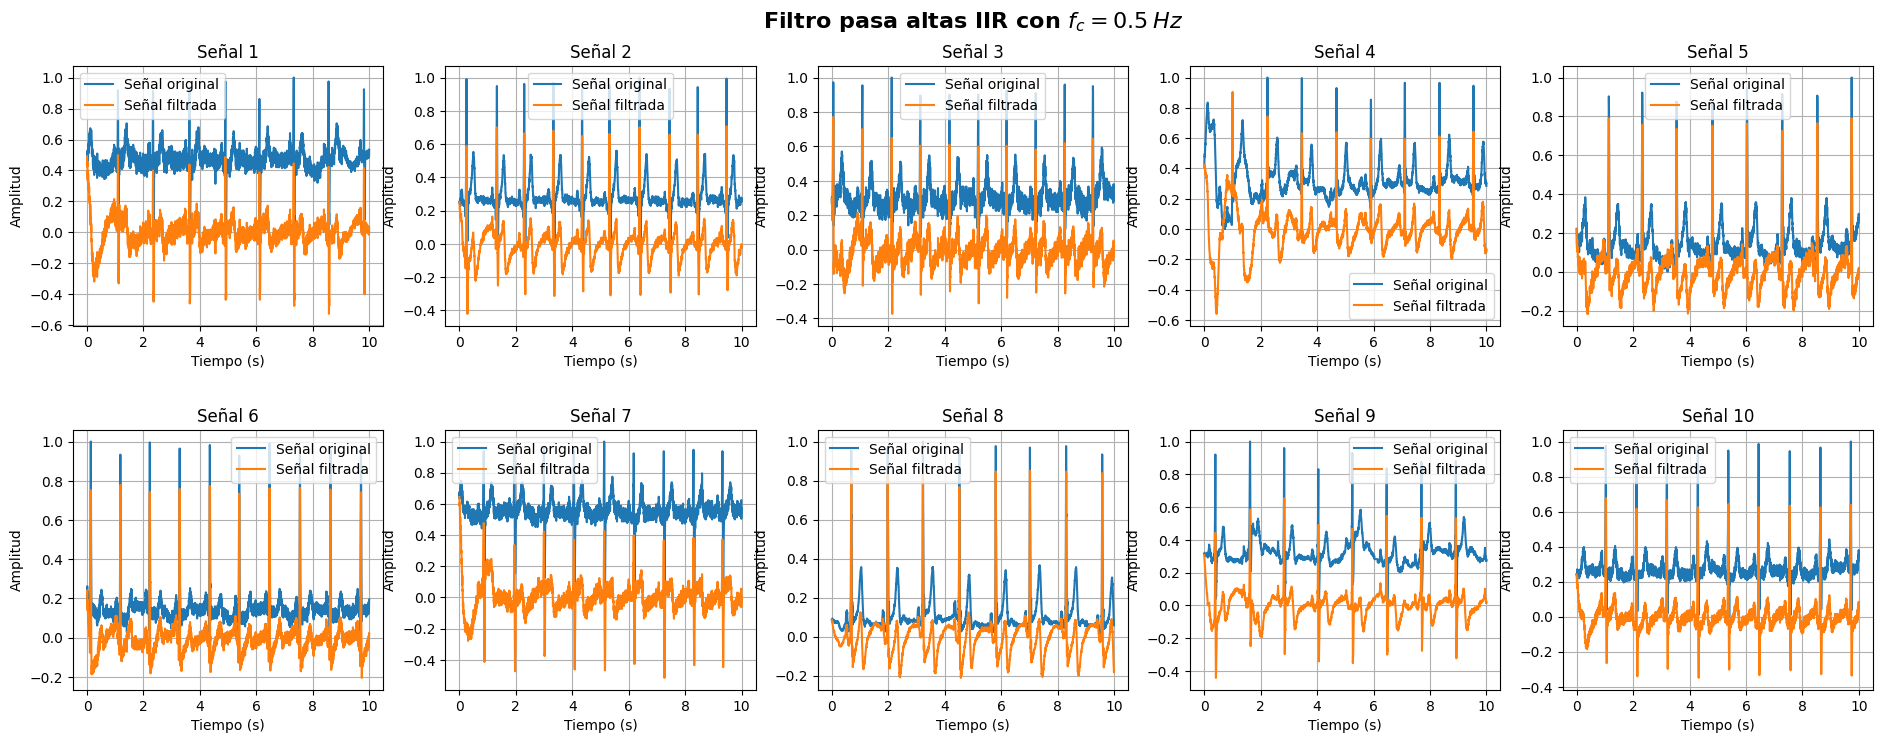

In [148]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa altas IIR con $f_c=0.5 \: Hz$', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = compresion(signal_df['II'].values[1:])
  filtered_signal = highpass_IIR(sig)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  ax.set_title(f'Señal {i + 1}')
  ax.set_ylabel('Amplitud')
  ax.set_xlabel('Tiempo (s)')
  ax.plot(n, sig, label='Señal original')
  ax.plot(n, filtered_signal[0], label='Señal filtrada')
  ax.legend()
  ax.grid()
plt.show()

In [152]:
def mfreqz(b_iir, a_iir, i, nyq_rate=1):
    w_iir, h_iir = signal.freqz(b_iir, a_iir);
    h_dB_iir = 20 * np.log10 (abs(h_iir)+1e-10)

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Respuesta al impulso en frecuencia filtro IIR para señal {i}', x=0.5, y=0.99, fontsize=14, fontweight='bold')
    axs[0].plot((w_iir/max(w_iir))*nyq_rate, abs(h_iir))
    axs[0].set(ylabel='Magnitud', title=r'Respuesta en frecuencia')
    axs[0].grid()

    axs[1].plot((w_iir/max(w_iir))*nyq_rate, h_dB_iir)
    axs[1].set(ylabel='Magnitud (dB)', xlabel=r'Frecuencia normalizada (x$\pi$rad/sample)', title=r'Respuesta en frecuencia')
    axs[1].grid()

    h_Phase = np.unwrap(np.arctan2(np.imag(h_iir),np.real(h_iir)))
    axs[2].plot((w_iir/max(w_iir))*nyq_rate, h_Phase)
    axs[2].set(ylabel='Fase (rad)', title=r'Respuesta en fase')
    axs[2].grid()

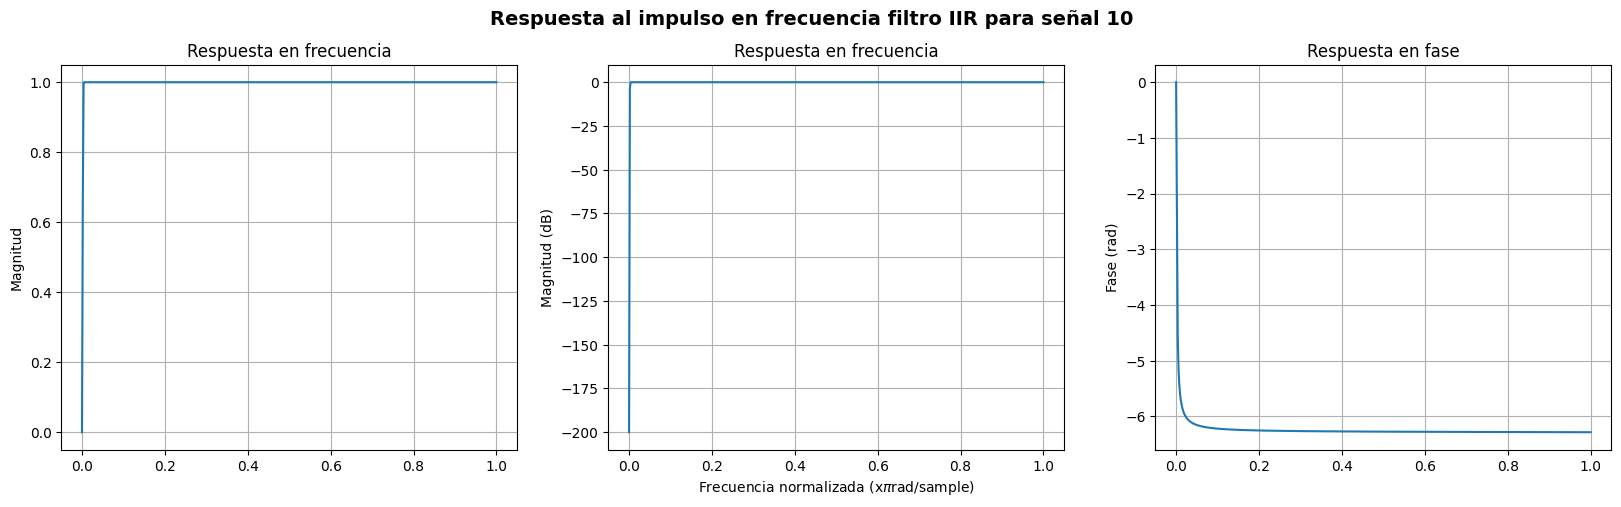

In [153]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1)

###<h4><b>5. </b>Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch.</h4>

###<h4><b>6. </b>Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP).</h4>

###<h4><b>7. </b>Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis. Discuta si hay más diferencias entre los tipos de señales con el flujo de procesamiento propuesto respecto al que se trabajó en el proyecto 2.</h4>

###<h4><b>8. </b>Hacer un informe con todos los puntos anteriores.</h4>

<b><u>Discusión</u></b><br>

<b><u>Conclusiones</u></b>

##<b>Referencias</b>


<b>[1]:</b> Biosenales y Sistemas. (3 de Octubre, 2024). Proyecto3 en <i>proyecto</i> [Repositorio de GitHub]. biosenalesysistemas. https://github.com/biosenalesysistemas/proyecto

<b>[2]:</b> Zheng, Jianwei (2019). ChapmanECG. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497.v1

<b>[3]:</b> Zheng, J., Chu, H., Struppa, D. et al. Optimal Multi-Stage Arrhythmia Classification Approach. <i>Sci Rep</i> 10, 2898 (2020). https://doi.org/10.1038/s41598-020-59821-7

<b>[4]:</b> Wikipedia. (5 de Diciembre, 2023). <i>Regresión local</i>. Wikipedia, La enciclopedia libre. Recuperado de https://es.wikipedia.org/wiki/Regresi%C3%B3n_local

<b>[5]:</b> Antoni Buades, Bartomeu Coll, and Jean-Michel Morel, <i>Non-Local Means Denoising</i>, Image Processing On Line, 1 (2011), pp. 208–212. https://doi.org/10.5201/ipol.2011.bcm_nlm